# Economic Data Analysis 

We will be doing some real world data analysis on economic data, using **pandas** and we will be scraping the data from [FRED](https://fred.stlouisfed.org/) using their API.

In [355]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns 
from fredapi import Fred

plt.style.use('fivethirtyeight')
%config InlineBackend.figure_format = 'svg'

In [356]:
pd.options.display.max_columns = 500

In [357]:
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

In [358]:
import os
from dotenv import load_dotenv

load_dotenv()
api_key = os.environ.get('FRED_API_KEY')

## 1. Create the Fred object

In [359]:
fred = Fred(api_key)

## 2. Search Fred for data

In [360]:
sp_search = fred.search('S&P', order_by='popularity')

In [361]:
sp_search.shape # The number of rows is set to 1000 by default, so that you don't accidentally pull too much data

(1000, 15)

In [362]:
sp_search

id realtime_start realtime_end  \
series id                                                        
BAMLH0A0HYM2          BAMLH0A0HYM2     2023-03-12   2023-03-12   
CSUSHPINSA              CSUSHPINSA     2023-03-12   2023-03-12   
BAMLH0A0HYM2EY      BAMLH0A0HYM2EY     2023-03-12   2023-03-12   
SP500                        SP500     2023-03-12   2023-03-12   
CSUSHPISA                CSUSHPISA     2023-03-12   2023-03-12   
...                            ...            ...          ...   
RTFPNAFJA632NRUG  RTFPNAFJA632NRUG     2023-03-12   2023-03-12   
QKRPAMUSDA              QKRPAMUSDA     2023-03-12   2023-03-12   
RGDPNALTA666NRUG  RGDPNALTA666NRUG     2023-03-12   2023-03-12   
A0117ADEA422NNBR  A0117ADEA422NNBR     2023-03-12   2023-03-12   
DDDM02ZAA156NWDB  DDDM02ZAA156NWDB     2023-03-12   2023-03-12   

                                                              title  \
series id                                                             
BAMLH0A0HYM2      ICE BofA US High Yield Index Option-Adjusted S...   
CSUSHPINSA          S&P/Case-Shiller U.S. National Home Price Index   
BAMLH0A0HYM2EY         ICE BofA US High Yield Index Effective Yield   
SP500                                                       S&P 500   
CSUSHPISA           S&P/Case-Shiller U.S. National Home Price Index   
...                                                             ...   
RTFPNAFJA632NRUG  Total Factor Productivity at Constant National...   
QKRPAMUSDA        Total Credit to Private Non-Financial Sector, ...   
RGDPNALTA666NRUG  Real GDP at Constant National Prices for Lithu...   
A0117ADEA422NNBR                        Coal Production for Germany   
DDDM02ZAA156NWDB  Stock Market Total Value Traded to GDP for Sou...   

                 observation_start observation_end                  frequency  \
series id                                                                       
BAMLH0A0HYM2            1996-12-31      2023-03-09               Daily, Close   
CSUSHPINSA              1987-01-01      2022-12-01                    Monthly   
BAMLH0A0HYM2EY          1996-12-31      2023-03-09               Daily, Close   
SP500                   2013-03-11      2023-03-10               Daily, Close   
CSUSHPISA               1987-01-01      2022-12-01                    Monthly   
...                            ...             ...                        ...   
RTFPNAFJA632NRUG        1980-01-01      2019-01-01                     Annual   
QKRPAMUSDA              1962-10-01      2022-07-01  Quarterly, End of Quarter   
RGDPNALTA666NRUG        1990-01-01      2019-01-01                     Annual   
A0117ADEA422NNBR        1870-01-01      1911-01-01                     Annual   
DDDM02ZAA156NWDB        1975-01-01      2020-01-01                     Annual   

                 frequency_short                          units  \
series id                                                         
BAMLH0A0HYM2                   D                        Percent   
CSUSHPINSA                     M             Index Jan 2000=100   
BAMLH0A0HYM2EY                 D                        Percent   
SP500                          D                          Index   
CSUSHPISA                      M             Index Jan 2000=100   
...                          ...                            ...   
RTFPNAFJA632NRUG               A                   Index 2017=1   
QKRPAMUSDA                     Q         Billions of US Dollars   
RGDPNALTA666NRUG               A  Millions of 2017 U.S. Dollars   
A0117ADEA422NNBR               A        Millions of Metric Tons   
DDDM02ZAA156NWDB               A                        Percent   

                          units_short      seasonal_adjustment  \
series id                                                        
BAMLH0A0HYM2                        %  Not Seasonally Adjusted   
CSUSHPINSA         Index Jan 2000=100  Not Seasonally Adjusted   
BAMLH0A0HYM2EY                      %  Not Seasonally Adjus

## 3. Get the raw data and Plot

In [363]:
sp500 = fred.get_series(series_id='SP500')

In [364]:
sp500

2013-03-11    1556.22
2013-03-12    1552.48
2013-03-13    1554.52
2013-03-14    1563.23
2013-03-15    1560.70
               ...   
2023-03-06    4048.42
2023-03-07    3986.37
2023-03-08    3992.01
2023-03-09    3918.32
2023-03-10    3861.59
Length: 2610, dtype: float64

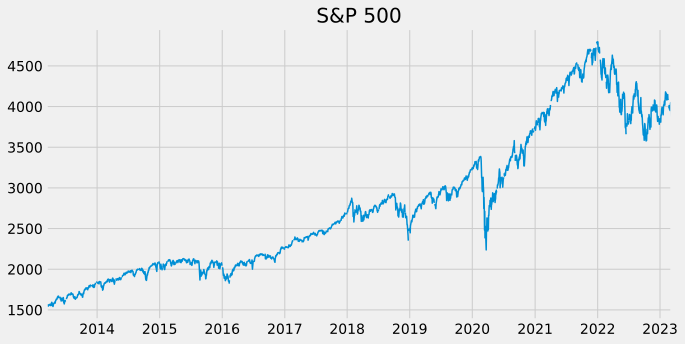

In [365]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=1.5)
plt.show()

## 4. Pull and Join multiple Data Series

In [366]:
unempl_results = fred.search('unemployment')

In [367]:
unempl_results

id realtime_start realtime_end  \
series id                                                      
UNRATE                    UNRATE     2023-03-12   2023-03-12   
UNRATENSA              UNRATENSA     2023-03-12   2023-03-12   
NROU                        NROU     2023-03-12   2023-03-12   
UNEMPLOY                UNEMPLOY     2023-03-12   2023-03-12   
CCSA                        CCSA     2023-03-12   2023-03-12   
...                          ...            ...          ...   
LRHUTTTTHUM156N  LRHUTTTTHUM156N     2023-03-12   2023-03-12   
LMUNRRTTATA156N  LMUNRRTTATA156N     2023-03-12   2023-03-12   
COLO808URN            COLO808URN     2023-03-12   2023-03-12   
LRHUTTTTPLM156N  LRHUTTTTPLM156N     2023-03-12   2023-03-12   
HUNT601UR              HUNT601UR     2023-03-12   2023-03-12   

                                                             title  \
series id                                                            
UNRATE                                           Unemployment Rate   
UNRATENSA                                        Unemployment Rate   
NROU                              Noncyclical Rate of Unemployment   
UNEMPLOY                                        Unemployment Level   
CCSA                       Continued Claims (Insured Unemployment)   
...                                                            ...   
LRHUTTTTHUM156N  Harmonized Unemployment Rate: Total: All Perso...   
LMUNRRTTATA156N  Labour - Other Labour Market Measures: Registe...   
COLO808URN         Unemployment Rate in Colorado Springs, CO (MSA)   
LRHUTTTTPLM156N  Harmonized Unemployment Rate: Total: All Perso...   
HUNT601UR                Unemployment Rate in Huntsville, AL (MSA)   

                observation_start observation_end                frequency  \
series id                                                                    
UNRATE                 1948-01-01      2023-02-01                  Monthly   
UNRATENSA              1948-01-01      2023-02-01                  Monthly   
NROU                   1949-01-01      2032-10-01                Quarterly   
UNEMPLOY               1948-01-01      2023-02-01                  Monthly   
CCSA                   1967-01-07      2023-02-25  Weekly, Ending Saturday   
...                           ...             ...                      ...   
LRHUTTTTHUM156N        1996-01-01      2022-12-01                  Monthly   
LMUNRRTTATA156N        1960-01-01      2021-01-01                   Annual   
COLO808URN             1990-01-01      2022-12-01                  Monthly   
LRHUTTTTPLM156N        1997-01-01      2022-12-01                  Monthly   
HUNT601UR              1990-01-01      2022-12-01                  Monthly   

                frequency_short                 units        units_short  \
series id                                                                  
UNRATE                        M               Percent                  %   
UNRATENSA                     M               Percent                  %   
NROU                          Q               Percent                  %   
UNEMPLOY                      M  Thousands of Persons  Thous. of Persons   
CCSA                          W                Number             Number   
...                         ...                   ...                ...   
LRHUTTTTHUM156N               M               Percent                  %   
LMUNRRTTATA156N               A               Percent                  %   
COLO808URN                    M               Percent                  %   
LRHUTTTTPLM156N               M               Percent                  %   
HUNT601UR                     M               Percent                  %   

                          seasonal_adjustment seasonal_adjustment_short  \
series id                                                                 
UNRATE                    Seasonally Adjusted                        SA   
UNRATENSA             Not Seasonally Adjusted            

In [368]:
unrate = fred.get_series('UNRATE')
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2022-10-01    3.7
2022-11-01    3.6
2022-12-01    3.5
2023-01-01    3.4
2023-02-01    3.6
Length: 902, dtype: float64

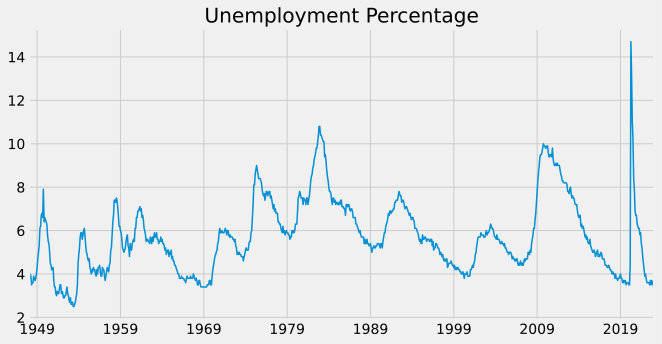

In [369]:
unrate.plot(figsize=(10, 5), title='Unemployment Percentage', lw=1.5)
plt.show()

In [370]:
# Unemployment metadata frame
unemployment_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
unemployment_df = unemployment_df.query('seasonal_adjustment == "Seasonally Adjusted" and units=="Percent"')
unemployment_df = unemployment_df.loc[unemployment_df['title'].str.contains('Unemployment Rate')]

In [371]:
all_results = []

for myid in unemployment_df.index: 
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)


In [372]:
unemp_results = pd.concat(all_results, axis=1).drop_duplicates().drop(['M0892AUSM156SNBR', 'M0892BUSM156SNBR', 'CAUR'], axis=1)

In [373]:
unemp_states = unemp_results.drop(['UNRATE', 'LNS14000006', 'LNS14000031', 
                                   'U2RATE', 'LNS14000002', 'LNS14000024' , 
                                   'LNS14000009', 'LNS14000001', 'LNS14027662'], axis=1)

In [374]:
unemp_states = unemp_states.filter(regex='^(?!LNS)').filter(regex='^(?!LR)')

In [375]:
unemp_states_filtered = unemp_states[unemp_states.index.year >= 1976].drop(['PRUR', 'USAURAMS', 'CSOUUR', 
                                                                            'CWSTUR', 
                                                                            'CNERUR', 
                                                                            'CMWRUR'], axis=1)

In [376]:
unemp_states_filtered = unemp_states_filtered.filter(regex='^(?!LASM)')

In [377]:
id_to_state = unemployment_df['title'].str.replace('Unemployment Rate in','').to_dict()
unemp_states_filtered.columns = [id_to_state[c] for c in unemp_states_filtered.columns]

In [378]:
px.line(unemp_states_filtered)

## 5. Getting Data from a specific date or range 

We can immediately notice that the unemployment rate suddenly spiked in 2020, which is probably due to the COVID-19 pandemic. Let's pull April 2020 data and see what happened.

In [379]:
unemp_april = unemp_states_filtered.loc[unemp_states_filtered.index == '2020-04-01'].T

In [380]:
unemp_april.sort_values('2020-04-01')

2020-04-01
 Wyoming                          5.4
 Connecticut                      8.0
 Nebraska                         8.2
 North Dakota                     8.3
 South Dakota                     8.8
 Minnesota                        9.0
 Maine                            9.1
 New Mexico                       9.5
 Maryland                         9.5
 Arkansas                        10.0
 Utah                            10.0
 Iowa                            10.5
 the District of Columbia        11.1
 Missouri                        11.2
 Colorado                        11.6
 South Carolina                  11.6
 Virginia                        11.6
 Idaho                           11.8
 Alaska                          11.9
 Kansas                          12.2
 Montana                         12.2
 Georgia                         12.3
 Oklahoma                        12.6
 Texas                           12.6
 Delaware                        13.1
 Florida                         13.2
 Oregon                          13.3
 Louisiana                       13.5
 Alabama                         13.7
 Arizona                         13.9
 Wisconsin                       14.1
 North Carolina                  14.2
 Vermont                         14.3
 Mississippi                     15.4
 New Jersey                      15.5
 West Virginia                   15.5
 Tennessee                       15.9
 New Hampshire                   16.2
 New York                        16.2
 Ohio                            16.4
 Kentucky                        16.5
 Pennsylvania                    16.5
 Indiana                         16.8
 Washington                      16.8
 Massachusetts                   17.1
 Illinois                        17.4
 Rhode Island                    18.4
 Hawaii                          22.4
 Michigan                        22.7
 Nevada                          28.5

In [381]:
unemp_april_sorted = unemp_april.sort_values('2020-04-01')

In [382]:
fig = px.bar(unemp_april_sorted, title='Unemployment Rate by State, April 2020', orientation='h', 
             height=800, color_discrete_sequence=['#424EF9', 'green'])
fig.update_layout(legend_title='April 2020')
fig.show()

### Pull Participation Rate

In [383]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [384]:
part_df.head(20)

id realtime_start realtime_end  \
series id                                                      
CIVPART                  CIVPART     2023-03-12   2023-03-12   
LNS11300060          LNS11300060     2023-03-12   2023-03-12   
LNS11300002          LNS11300002     2023-03-12   2023-03-12   
LNS11300001          LNS11300001     2023-03-12   2023-03-12   
LNS11324230          LNS11324230     2023-03-12   2023-03-12   
LNS11300012          LNS11300012     2023-03-12   2023-03-12   
LNS11300036          LNS11300036     2023-03-12   2023-03-12   
LNS11300006          LNS11300006     2023-03-12   2023-03-12   
LRAC25MAUSM156S  LRAC25MAUSM156S     2023-03-12   2023-03-12   
LNS11327662          LNS11327662     2023-03-12   2023-03-12   
LBSSA06                  LBSSA06     2023-03-12   2023-03-12   
LBSSA12                  LBSSA12     2023-03-12   2023-03-12   
LNS11327660          LNS11327660     2023-03-12   2023-03-12   
LNS11300028          LNS11300028     2023-03-12   2023-03-12   
LNS11300031          LNS11300031     2023-03-12   2023-03-12   
LRAC25FEUSM156S  LRAC25FEUSM156S     2023-03-12   2023-03-12   
LNS11300009          LNS11300009     2023-03-12   2023-03-12   
LBSSA08                  LBSSA08     2023-03-12   2023-03-12   
LBSSA21                  LBSSA21     2023-03-12   2023-03-12   
LNS11300003          LNS11300003     2023-03-12   2023-03-12   

                                                             title  \
series id                                                            
CIVPART                             Labor Force Participation Rate   
LNS11300060            Labor Force Participation Rate - 25-54 Yrs.   
LNS11300002                 Labor Force Participation Rate - Women   
LNS11300001                   Labor Force Participation Rate - Men   
LNS11324230        Labor Force Participation Rate - 55 Yrs. & over   
LNS11300012            Labor Force Participation Rate - 16-19 Yrs.   
LNS11300036            Labor Force Participation Rate - 20-24 Yrs.   
LNS11300006      Labor Force Participation Rate - Black or Afri...   
LRAC25MAUSM156S  Activity Rate: Aged 25-54: Males for the Unite...   
LNS11327662      Labor Force Participation Rate - Bachelor's De...   
LBSSA06              Labor Force Participation Rate for California   
LBSSA12                 Labor Force Participation Rate for Florida   
LNS11327660      Labor Force Participation Rate - High School G...   
LNS11300028      Labor Force Participation Rate - 20 Yrs. & ove...   
LNS11300031      Labor Force Participation Rate - 20 Yrs. & ove...   
LRAC25FEUSM156S  Activity Rate: Aged 25-54: Females for the Uni...   
LNS11300009      Labor Force Participation Rate - Hispanic or L...   
LBSSA08                Labor Force Participation Rate for Colorado   
LBSSA21                Labor Force Participation Rate for Kentucky   
LNS11300003                 Labor Force Participation Rate - White   

                observation_start observation_end frequency frequency_short  \
series id                                                                     
CIVPART                1948-01-01      2023-02-01   Monthly               M   
LNS11300060            1948-01-01      2023-02-01   Monthly               M   
LNS11300002            1948-01-01      2023-02-01   Monthly               M   
LNS11300001            1948-01-01      2023-02-01   Monthly               M   
LNS11324230            1948-01-01      2023-02-01   Monthly               M   
LNS11300012            1948-01-01      2023-02-01   Monthly               M   
LNS11300036            1948-01-01      2023-02-01   Monthly               M   
LNS11300006            1972-01-01      2023-02-01   Monthly               M   
LRAC25MAUSM156S        1960-01-01      2023-01-01   Monthly               M   
LNS11327662            1992-01-01      2023-02-01   Monthly               M   
LBSSA06                1976-01-01      2022-12-01   Monthly               M   
LBSSA12                1976-01-01      2022-12-01   M

In [385]:
part_df.columns

Index(['id', 'realtime_start', 'realtime_end', 'title', 'observation_start',
       'observation_end', 'frequency', 'frequency_short', 'units',
       'units_short', 'seasonal_adjustment', 'seasonal_adjustment_short',
       'last_updated', 'popularity', 'notes'],
      dtype='object')

In [386]:
part_df_filtered = [part_df[(part_df['id'].str.len() <= 7)].drop('CIVPART')]

In [387]:
part_df_filtered[0]

id realtime_start realtime_end  \
series id                                        
LBSSA06    LBSSA06     2023-03-12   2023-03-12   
LBSSA12    LBSSA12     2023-03-12   2023-03-12   
LBSSA08    LBSSA08     2023-03-12   2023-03-12   
LBSSA21    LBSSA21     2023-03-12   2023-03-12   
LBSSA01    LBSSA01     2023-03-12   2023-03-12   
LBSSA27    LBSSA27     2023-03-12   2023-03-12   
LBSSA39    LBSSA39     2023-03-12   2023-03-12   
LBSSA55    LBSSA55     2023-03-12   2023-03-12   
LBSSA26    LBSSA26     2023-03-12   2023-03-12   
LBSSA48    LBSSA48     2023-03-12   2023-03-12   
LBSSA42    LBSSA42     2023-03-12   2023-03-12   
LBSSA36    LBSSA36     2023-03-12   2023-03-12   
LBSSA13    LBSSA13     2023-03-12   2023-03-12   
LBSSA25    LBSSA25     2023-03-12   2023-03-12   
LBSSA24    LBSSA24     2023-03-12   2023-03-12   
LBSSA45    LBSSA45     2023-03-12   2023-03-12   
LBSSA47    LBSSA47     2023-03-12   2023-03-12   
LBSSA23    LBSSA23     2023-03-12   2023-03-12   
LBSSA49    LBSSA49     2023-03-12   2023-03-12   
LBSSA37    LBSSA37     2023-03-12   2023-03-12   
LBSSA22    LBSSA22     2023-03-12   2023-03-12   
LBSSA28    LBSSA28     2023-03-12   2023-03-12   
LBSSA04    LBSSA04     2023-03-12   2023-03-12   
LBSSA20    LBSSA20     2023-03-12   2023-03-12   
LBSSA54    LBSSA54     2023-03-12   2023-03-12   
LBSSA35    LBSSA35     2023-03-12   2023-03-12   
LBSSA41    LBSSA41     2023-03-12   2023-03-12   
LBSSA40    LBSSA40     2023-03-12   2023-03-12   
LBSSA18    LBSSA18     2023-03-12   2023-03-12   
LBSSA17    LBSSA17     2023-03-12   2023-03-12   
LBSSA53    LBSSA53     2023-03-12   2023-03-12   
LBSSA19    LBSSA19     2023-03-12   2023-03-12   
LBSSA09    LBSSA09     2023-03-12   2023-03-12   
LBSSA15    LBSSA15     2023-03-12   2023-03-12   
LBSSA34    LBSSA34     2023-03-12   2023-03-12   
LBSSA16    LBSSA16     2023-03-12   2023-03-12   
LBSSA32    LBSSA32     2023-03-12   2023-03-12   
LBSSA51    LBSSA51     2023-03-12   2023-03-12   
LBSSA29    LBSSA29     2023-03-12   2023-03-12   
LBSSA05    LBSSA05     2023-03-12   2023-03-12   
LBSSA31    LBSSA31     2023-03-12   2023-03-12   
LBSSA33    LBSSA33     2023-03-12   2023-03-12   
LBSSA50    LBSSA50     2023-03-12   2023-03-12   
LBSSA30    LBSSA30     2023-03-12   2023-03-12   
LBSSA02    LBSSA02     2023-03-12   2023-03-12   
LBSSA10    LBSSA10     2023-03-12   2023-03-12   
LBSSA38    LBSSA38     2023-03-12   2023-03-12   
LBSSA46    LBSSA46     2023-03-12   2023-03-12   
LBSSA44    LBSSA44     2023-03-12   2023-03-12   
LBSSA56    LBSSA56     2023-03-12   2023-03-12   
LBSSA11    LBSSA11     2023-03-12   2023-03-12   

                                                       title  \
series id                                                      
LBSSA06        Labor Force Participation Rate for California   
LBSSA12           Labor Force Participation Rate for Florida   
LBSSA08          Labor Force Participation Rate for Colorado   
LBSSA21          Labor Force Participation Rate for Kentucky   
LBSSA01           Labor Force Participation Rate for Alabama   
LBSSA27         Labor Force Participation Rate for Minnesota   
LBSSA39              Labor Force Participation Rate for Ohio   
LBSSA55         Labor Force Participation Rate for Wisconsin   
LBSSA26          Labor Force Participation Rate for Michigan   
LBSSA48             Labor Force Participation Rate for Texas   
LBSSA42      Labor Force Participation Rate for Pennsylvania   
LBSSA36          Labor Force Participation Rate for New York   
LBSSA13           Labor Force Participation Rate for Georgia   
LBSSA25     Labor Force Participation Rate for Massachusetts   
LBSSA24          Labor Force Participation Rate for Maryland   
LBSSA45    Labor Force Participation Rate for South Carolina   
LBSSA47         Labor Force Participation Rate for Tennessee   
LBSSA23             Labor Force Participation Rate for Maine   
LBSSA49              Labor Force Participation Rate for Utah   
LBSSA37    Labor Forc

In [388]:
participation_df = part_df_filtered[0]

In [389]:
part_id_to_state = participation_df['title'].str.replace('Labor Force Participation Rate for', '').to_dict()

In [390]:
part_id_to_state

{'LBSSA06': ' California',
 'LBSSA12': ' Florida',
 'LBSSA08': ' Colorado',
 'LBSSA21': ' Kentucky',
 'LBSSA01': ' Alabama',
 'LBSSA27': ' Minnesota',
 'LBSSA39': ' Ohio',
 'LBSSA55': ' Wisconsin',
 'LBSSA26': ' Michigan',
 'LBSSA48': ' Texas',
 'LBSSA42': ' Pennsylvania',
 'LBSSA36': ' New York',
 'LBSSA13': ' Georgia',
 'LBSSA25': ' Massachusetts',
 'LBSSA24': ' Maryland',
 'LBSSA45': ' South Carolina',
 'LBSSA47': ' Tennessee',
 'LBSSA23': ' Maine',
 'LBSSA49': ' Utah',
 'LBSSA37': ' North Carolina',
 'LBSSA22': ' Louisiana',
 'LBSSA28': ' Mississippi',
 'LBSSA04': ' Arizona',
 'LBSSA20': ' Kansas',
 'LBSSA54': ' West Virginia',
 'LBSSA35': ' New Mexico',
 'LBSSA41': ' Oregon',
 'LBSSA40': ' Oklahoma',
 'LBSSA18': ' Indiana',
 'LBSSA17': ' Illinois',
 'LBSSA53': ' Washington',
 'LBSSA19': ' Iowa',
 'LBSSA09': ' Connecticut',
 'LBSSA15': ' Hawaii',
 'LBSSA34': ' New Jersey',
 'LBSSA16': ' Idaho',
 'LBSSA32': ' Nevada',
 'LBSSA51': ' Virginia',
 'LBSSA29': ' Missouri',
 'LBSSA05': ' A

In [391]:
all_results = []

for myid in participation_df.index: 
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)
participation_results = pd.concat(all_results, axis=1)

In [392]:
participation_results

LBSSA06  LBSSA12  LBSSA08  LBSSA21  LBSSA01  LBSSA27  LBSSA39  \
1976-01-01     62.6     55.8     67.2     60.5     57.0     65.6     61.7   
1976-02-01     62.4     55.7     67.0     60.3     56.9     65.5     61.7   
1976-03-01     62.2     55.5     66.8     60.2     56.8     65.4     61.7   
1976-04-01     62.2     55.5     66.6     60.1     56.8     65.4     61.6   
1976-05-01     62.3     55.4     66.5     60.1     56.8     65.5     61.6   
...             ...      ...      ...      ...      ...      ...      ...   
2022-08-01     62.5     59.5     69.6     58.0     57.2     68.2     61.8   
2022-09-01     62.3     59.5     69.4     58.0     57.2     68.1     61.7   
2022-10-01     62.3     59.6     69.4     57.9     57.2     68.0     61.5   
2022-11-01     62.2     59.5     69.2     57.7     57.1     67.9     61.3   
2022-12-01     62.1     59.5     69.0     57.6     57.0     67.9     61.2   

            LBSSA55  LBSSA26  LBSSA48  LBSSA42  LBSSA36  LBSSA13  LBSSA25  \
1976-01-01     65.6     61.6     63.8     58.4     58.0     63.7     64.8   
1976-02-01     65.5     61.5     63.5     58.3     58.0     63.6     64.7   
1976-03-01     65.4     61.5     63.4     58.3     58.0     63.5     64.6   
1976-04-01     65.4     61.6     63.5     58.3     58.0     63.5     64.6   
1976-05-01     65.5     61.7     63.6     58.3     58.1     63.6     64.6   
...             ...      ...      ...      ...      ...      ...      ...   
2022-08-01     65.9     60.1     63.8     61.7     60.5     62.1     65.8   
2022-09-01     65.6     60.1     63.6     61.7     60.3     62.0     65.6   
2022-10-01     65.3     60.0     63.6     61.7     60.5     61.8     65.5   
2022-11-01     64.9     59.9     63.5     61.6     60.5     61.7     65.3   
2022-12-01     64.7     59.9     63.5     61.7     60.5     61.5     65.1   

            LBSSA24  LBSSA45  LBSSA47  LBSSA23  LBSSA49  LBSSA37  LBSSA22  \
1976-01-01     64.3     65.3     59.6     62.1     62.8     66.5     56.8   
1976-02-01     64.2     65.2     59.4     61.9     62.6     66.3     56.6   
1976-03-01     64.1     65.0     59.3     61.9     62.5     66.2     56.5   
1976-04-01     64.1     64.9     59.3     61.8     62.5     66.2     56.4   
1976-05-01     64.1     64.7     59.4     61.7     62.6     66.3     56.4   
...             ...      ...      ...      ...      ...      ...      ...   
2022-08-01     66.1     57.0     60.8     58.6     68.1     60.6     58.7   
2022-09-01     65.7     56.9     60.5     58.4     68.0     60.6     58.5   
2022-10-01     65.9     56.7     60.1     58.3     67.9     60.5     58.3   
2022-11-01     65.6     56.4     59.6     58.0     67.9     60.4     58.3   
2022-12-01     65.3     56.3     59.2     57.9     68.1     60.3     58.5   

            LBSSA28  LBSSA04  LBSSA20  LBSSA54  LBSSA35  LBSSA41  LBSSA40  \
1976-01-01     58.8     59.5     65.1     52.5     60.8     62.9     59.3   
1976-02-01     58.6     59.2     65.0     52.4     60.5     62.7     59.2   
1976-03-01     58.5     59.1     64.9     52.3     60.3     62.5     59.1   
1976-04-01     58.5     59.1     65.0     52.3     60.3     62.4     59.0   
1976-05-01     58.5     59.1     65.1     52.2     60.3     62.5     59.0   
...             ...      ...      ...      ...      ...      ...      ...   
2022-08-01     55.3     61.0     66.2     55.2     56.5     63.5     60.7   
2022-09-01     55.2     61.1     66.1     55.1     56.3     63.3     60.6   
2022-10-01     55.0     61.1     66.0     55.0     56.1     63.2     60.6   
2022-11-01     54.8     61.1     66.0     54.9     55.9     63.1     60.5   
2022-12-01     54.6     61.2     66.1     54.8     55.7     62.9     60.5   

            LBSSA18  LBSSA17  LBSSA53  LBSSA19  LBSSA09  LBSSA15  LBSSA34  \
1976-01-01     64.0     63.0     60.9     64.4     64.2     69.9     61.5   
1976-02-01     63.9     63.0     60.7     64.3     64.1     69.6     61.4   
1976-03-01     63.8     62.9     60.6     64.2     64.0     69.6     61.4   
1976

In [393]:
participation_results.columns = [part_id_to_state[c] for c in participation_results.columns]

In [394]:
participation_results

California   Florida   Colorado   Kentucky   Alabama   Minnesota  \
1976-01-01         62.6      55.8       67.2       60.5      57.0        65.6   
1976-02-01         62.4      55.7       67.0       60.3      56.9        65.5   
1976-03-01         62.2      55.5       66.8       60.2      56.8        65.4   
1976-04-01         62.2      55.5       66.6       60.1      56.8        65.4   
1976-05-01         62.3      55.4       66.5       60.1      56.8        65.5   
...                 ...       ...        ...        ...       ...         ...   
2022-08-01         62.5      59.5       69.6       58.0      57.2        68.2   
2022-09-01         62.3      59.5       69.4       58.0      57.2        68.1   
2022-10-01         62.3      59.6       69.4       57.9      57.2        68.0   
2022-11-01         62.2      59.5       69.2       57.7      57.1        67.9   
2022-12-01         62.1      59.5       69.0       57.6      57.0        67.9   

             Ohio   Wisconsin   Michigan   Texas   Pennsylvania   New York  \
1976-01-01   61.7        65.6       61.6    63.8           58.4       58.0   
1976-02-01   61.7        65.5       61.5    63.5           58.3       58.0   
1976-03-01   61.7        65.4       61.5    63.4           58.3       58.0   
1976-04-01   61.6        65.4       61.6    63.5           58.3       58.0   
1976-05-01   61.6        65.5       61.7    63.6           58.3       58.1   
...           ...         ...        ...     ...            ...        ...   
2022-08-01   61.8        65.9       60.1    63.8           61.7       60.5   
2022-09-01   61.7        65.6       60.1    63.6           61.7       60.3   
2022-10-01   61.5        65.3       60.0    63.6           61.7       60.5   
2022-11-01   61.3        64.9       59.9    63.5           61.6       60.5   
2022-12-01   61.2        64.7       59.9    63.5           61.7       60.5   

             Georgia   Massachusetts   Maryland   South Carolina   Tennessee  \
1976-01-01      63.7            64.8       64.3             65.3        59.6   
1976-02-01      63.6            64.7       64.2             65.2        59.4   
1976-03-01      63.5            64.6       64.1             65.0        59.3   
1976-04-01      63.5            64.6       64.1             64.9        59.3   
1976-05-01      63.6            64.6       64.1             64.7        59.4   
...              ...             ...        ...              ...         ...   
2022-08-01      62.1            65.8       66.1             57.0        60.8   
2022-09-01      62.0            65.6       65.7             56.9        60.5   
2022-10-01      61.8            65.5       65.9             56.7        60.1   
2022-11-01      61.7            65.3       65.6             56.4        59.6   
2022-12-01      61.5            65.1       65.3             56.3        59.2   

             Maine   Utah   North Carolina   Louisiana   Mississippi  \
1976-01-01    62.1   62.8             66.5        56.8          58.8   
1976-02-01    61.9   62.6             66.3        56.6          58.6   
1976-03-01    61.9   62.5             66.2        56.5          58.5   
1976-04-01    61.8   62.5             66.2        56.4          58.5   
1976-05-01    61.7   62.6             66.3        56.4          58.5   
...            ...    ...              ...         ...           ...   
2022-08-01    58.6   68.1             60.6        58.7          55.3   
2022-09-01    58.4   68.0             60.6        58.5          55.2   
2022-10-01    58.3   67.9             60.5        58.3          55.0   
2022-11-01    58.0   67.9             60.4        58.3          54.8   
2022-12-01    57.9   68.1             60.3        58.5          54.6   

             Arizona   Kansas   West Virginia   New Mexico   Oregon  \
1976-01-01      59.5     65.1            52.5         60.8     62.9   
1976-02-01      59.2     65.0            52.4         60.5     62.7   
1976-03-01      59.1     64.9            52.3         60.3     6

# Plot Unemployment Rate vs Participation Rate

Let's do this for each state over the years 2020 through 2023.

In [395]:
unemployment_rate = unemp_states_filtered
participation_rate = participation_results

In [396]:
unemployment_rate

Florida   Texas   New York   Pennsylvania   Alabama   Kentucky  \
1976-01-01       9.7     5.8       10.3            8.0       6.6        5.6   
1976-02-01       9.7     5.8       10.3            8.1       6.6        5.6   
1976-03-01       9.6     5.9       10.2            8.1       6.6        5.6   
1976-04-01       9.5     5.9       10.2            8.1       6.5        5.6   
1976-05-01       9.3     5.9       10.1            8.1       6.4        5.5   
...              ...     ...        ...            ...       ...        ...   
2022-10-01       2.7     4.0        4.3            4.0       2.7        3.9   
2022-11-01       2.6     4.0        4.3            4.0       2.7        4.0   
2022-12-01       2.5     3.9        4.3            3.9       2.8        4.0   
2023-01-01       NaN     NaN        NaN            NaN       NaN        NaN   
2023-02-01       NaN     NaN        NaN            NaN       NaN        NaN   

             Ohio   Michigan   North Carolina   Colorado   New Jersey  \
1976-01-01    8.1        9.9              6.4        5.8         10.3   
1976-02-01    8.1        9.9              6.4        5.7         10.3   
1976-03-01    8.1        9.9              6.4        5.7         10.3   
1976-04-01    8.0        9.8              6.3        5.6         10.3   
1976-05-01    7.8        9.6              6.1        5.6         10.3   
...           ...        ...              ...        ...          ...   
2022-10-01    4.2        4.2              3.8        3.6          3.4   
2022-11-01    4.2        4.3              3.9        3.5          3.4   
2022-12-01    4.2        4.3              3.9        3.3          3.4   
2023-01-01    NaN        NaN              NaN        NaN          NaN   
2023-02-01    NaN        NaN              NaN        NaN          NaN   

             Massachusetts   Washington   Georgia   Virginia   Tennessee  \
1976-01-01            10.5          8.5       8.4        6.1         6.0   
1976-02-01            10.5          8.5       8.4        6.1         6.0   
1976-03-01            10.5          8.4       8.4        6.1         6.0   
1976-04-01            10.3          8.5       8.3        6.0         6.0   
1976-05-01            10.1          8.5       8.1        5.9         5.9   
...                    ...          ...       ...        ...         ...   
2022-10-01             3.5          3.8       2.9        2.7         3.5   
2022-11-01             3.4          4.0       3.0        2.8         3.5   
2022-12-01             3.3          4.2       3.0        3.0         3.5   
2023-01-01             NaN          NaN       NaN        NaN         NaN   
2023-02-01             NaN          NaN       NaN        NaN         NaN   

             Illinois   Alaska   Minnesota   Iowa   Arkansas   Arizona  \
1976-01-01        6.6      7.1         6.0    4.3        7.3      10.2   
1976-02-01        6.6      7.1         6.0    4.3        7.3      10.2   
1976-03-01        6.6      7.0         5.9    4.3        7.3      10.1   
1976-04-01        6.6      6.9         5.8    4.2        7.2      10.0   
1976-05-01        6.6      6.9         5.7    4.1        7.1       9.8   
...               ...      ...         ...    ...        ...       ...   
2022-10-01        4.6      4.5         2.1    2.9        3.6       3.9   
2022-11-01        4.7      4.5         2.3    3.1        3.7       4.1   
2022-12-01        4.7      4.3         2.5    3.1        3.6       4.0   
2023-01-01        NaN      NaN         NaN    NaN        NaN       NaN   
2023-02-01        NaN      NaN         NaN    NaN        NaN       NaN   

             Wisconsin   Indiana   North Dakota   West Virginia   Nevada  \
1976-01-01         5.8       6.6            3.4             7.5      9.2   
1976-02-01         5.8       6.6            3.4             7.5      9.2   
1976-03-01         5.7       6.5            3.4             7.5      9.2   
1976-04-01         5.6       6.3            3.5             7.5      9.0   
1976-

### New York

In [397]:
from plotly.subplots import make_subplots

In [398]:
NY_20_23_unemp = unemployment_rate.query('index >= 2020')[' New York']
NY_20_23_part = participation_rate.query('index >= 2020')[' New York']

In [399]:
figure = px.line(NY_20_23_unemp, title="Unemployment and Participation Rates in New York (2020-2023)", color_discrete_sequence=['magenta'])
figure.add_trace(px.line(NY_20_23_part).data[0])
figure.update_layout(yaxis_title = 'Rates', xaxis_title = 'Time', legend_title = 'Rates')
figure.update_traces(marker = dict(size = 10), 
                     showlegend = True, 
                     legendgroup = "Rates")

figure.show()

Let's see for all states

In [400]:
len(unemployment_rate.columns) , len(participation_rate.columns)

(50, 51)

In [401]:
unemployment_rate.columns.sort_values() , participation_rate.columns.sort_values()

(Index([' Alabama', ' Alaska', ' Arizona', ' Arkansas', ' Colorado',
        ' Connecticut', ' Delaware', ' Florida', ' Georgia', ' Hawaii',
        ' Idaho', ' Illinois', ' Indiana', ' Iowa', ' Kansas', ' Kentucky',
        ' Louisiana', ' Maine', ' Maryland', ' Massachusetts', ' Michigan',
        ' Minnesota', ' Mississippi', ' Missouri', ' Montana', ' Nebraska',
        ' Nevada', ' New Hampshire', ' New Jersey', ' New Mexico', ' New York',
        ' North Carolina', ' North Dakota', ' Ohio', ' Oklahoma', ' Oregon',
        ' Pennsylvania', ' Rhode Island', ' South Carolina', ' South Dakota',
        ' Tennessee', ' Texas', ' Utah', ' Vermont', ' Virginia', ' Washington',
        ' West Virginia', ' Wisconsin', ' Wyoming',
        ' the District of Columbia'],
       dtype='object'),
 Index([' Alabama', ' Alaska', ' Arizona', ' Arkansas', ' California',
        ' Colorado', ' Connecticut', ' Delaware', ' District Of Columbia',
        ' Florida', ' Georgia', ' Hawaii', ' Idaho', ' 

Let's clean a bit (I missed California somehow, sorry California).

In [402]:
participation_rate = participation_rate.drop(' California', axis=1)

In [403]:
unemployment_rate.columns = unemployment_rate.columns.str.strip()
participation_rate.columns = participation_rate.columns.str.strip()

# stripping trailing and leading whitespaces

In [404]:
unemployment_rate.columns = unemployment_rate.columns.str.replace('the District of Columbia', 'District Of Columbia')

In [406]:
unemployment_rate.head(3)

Florida  Texas  New York  Pennsylvania  Alabama  Kentucky  Ohio  \
1976-01-01      9.7    5.8      10.3           8.0      6.6       5.6   8.1   
1976-02-01      9.7    5.8      10.3           8.1      6.6       5.6   8.1   
1976-03-01      9.6    5.9      10.2           8.1      6.6       5.6   8.1   

            Michigan  North Carolina  Colorado  New Jersey  Massachusetts  \
1976-01-01       9.9             6.4       5.8        10.3           10.5   
1976-02-01       9.9             6.4       5.7        10.3           10.5   
1976-03-01       9.9             6.4       5.7        10.3           10.5   

            Washington  Georgia  Virginia  Tennessee  Illinois  Alaska  \
1976-01-01         8.5      8.4       6.1        6.0       6.6     7.1   
1976-02-01         8.5      8.4       6.1        6.0       6.6     7.1   
1976-03-01         8.4      8.4       6.1        6.0       6.6     7.0   

            Minnesota  Iowa  Arkansas  Arizona  Wisconsin  Indiana  \
1976-01-01        6.0   4.3       7.3     10.2        5.8      6.6   
1976-02-01        6.0   4.3       7.3     10.2        5.8      6.6   
1976-03-01        5.9   4.3       7.3     10.1        5.7      6.5   

            North Dakota  West Virginia  Nevada  Missouri  Louisiana  \
1976-01-01           3.4            7.5     9.2       5.9        6.3   
1976-02-01           3.4            7.5     9.2       5.9        6.3   
1976-03-01           3.4            7.5     9.2       5.9        6.3   

            South Carolina  Oregon  New Mexico  Oklahoma  Hawaii  Maryland  \
1976-01-01             7.4     9.5         8.6       5.8     9.8       6.4   
1976-02-01             7.4     9.5         8.7       5.8     9.8       6.4   
1976-03-01             7.3     9.4         8.7       5.8     9.8       6.4   

            Utah  Rhode Island  Connecticut  Kansas  New Hampshire  \
1976-01-01   5.8           7.8          9.8     4.2            6.5   
1976-02-01   5.9           7.8          9.8     4.2            6.5   
1976-03-01   5.8           7.7          9.8     4.2            6.5   

            Mississippi  Montana  Nebraska  Maine  Wyoming  Idaho  \
1976-01-01          6.7      5.8       3.3    8.7      4.1    5.6   
1976-02-01          6.7      5.8       3.3    8.7      4.1    5.6   
1976-03-01          6.6      5.8       3.3    8.6      4.1    5.6   

            District Of Columbia  South Dakota  Vermont  Delaware  
1976-01-01                   8.7           3.3      8.6       8.0  
1976-02-01                   8.7           3.3      8.6       8.0  
1976-03-01                   8.6           3.2      8.6       8.0

In [407]:
participation_rate.head(3)

Florida  Colorado  Kentucky  Alabama  Minnesota  Ohio  Wisconsin  \
1976-01-01     55.8      67.2      60.5     57.0       65.6  61.7       65.6   
1976-02-01     55.7      67.0      60.3     56.9       65.5  61.7       65.5   
1976-03-01     55.5      66.8      60.2     56.8       65.4  61.7       65.4   

            Michigan  Texas  Pennsylvania  New York  Georgia  Massachusetts  \
1976-01-01      61.6   63.8          58.4      58.0     63.7           64.8   
1976-02-01      61.5   63.5          58.3      58.0     63.6           64.7   
1976-03-01      61.5   63.4          58.3      58.0     63.5           64.6   

            Maryland  South Carolina  Tennessee  Maine  Utah  North Carolina  \
1976-01-01      64.3            65.3       59.6   62.1  62.8            66.5   
1976-02-01      64.2            65.2       59.4   61.9  62.6            66.3   
1976-03-01      64.1            65.0       59.3   61.9  62.5            66.2   

            Louisiana  Mississippi  Arizona  Kansas  West Virginia  \
1976-01-01       56.8         58.8     59.5    65.1           52.5   
1976-02-01       56.6         58.6     59.2    65.0           52.4   
1976-03-01       56.5         58.5     59.1    64.9           52.3   

            New Mexico  Oregon  Oklahoma  Indiana  Illinois  Washington  Iowa  \
1976-01-01        60.8    62.9      59.3     64.0      63.0        60.9  64.4   
1976-02-01        60.5    62.7      59.2     63.9      63.0        60.7  64.3   
1976-03-01        60.3    62.5      59.1     63.8      62.9        60.6  64.2   

            Connecticut  Hawaii  New Jersey  Idaho  Nevada  Virginia  \
1976-01-01         64.2    69.9        61.5   63.0    71.3      65.9   
1976-02-01         64.1    69.6        61.4   62.8    70.8      65.8   
1976-03-01         64.0    69.6        61.4   62.7    70.5      65.6   

            Missouri  Arkansas  Nebraska  New Hampshire  Vermont  Montana  \
1976-01-01      60.5      57.9      64.9           65.9     63.6     62.7   
1976-02-01      60.3      57.8      64.9           65.6     63.4     62.5   
1976-03-01      60.3      57.7      64.8           65.6     63.2     62.4   

            Alaska  Delaware  North Dakota  South Dakota  Rhode Island  \
1976-01-01    69.0      62.7          62.6          64.6          63.8   
1976-02-01    68.4      62.5          62.4          64.4          63.7   
1976-03-01    67.8      62.5          62.3          64.4          63.6   

            Wyoming  District Of Columbia  
1976-01-01     65.3                  64.4  
1976-02-01     64.9                  64.5  
1976-03-01     64.7                  64.5

In [408]:
import plotly.graph_objs as go

Let me reorder the columns to be sorted in alphabetical order for both unemployment and participation rate.

In [412]:
unemployment_rate.columns = unemployment_rate.columns.sort_values() 
participation_rate.columns = participation_rate.columns.sort_values()

In [414]:
state_names = list(unemployment_rate.columns) # I get the list of state names from either one

In [415]:
len(state_names)

50

In [425]:
#N_rows = 10
#N_cols = 5
#fig = make_subplots(rows=N_rows, cols=N_cols, shared_xaxes=True, subplot_titles=state_names)
#
#
#for i, state in enumerate(state_names): 
#    row = i % N_rows + 1
#    col = i // N_rows + 1
#
#    fig.add_trace(
#        go.Scatter(x=unemployment_rate.index, y=unemployment_rate[state], name= f'Unemployment Rate of {state}'), 
#        row=row, 
#        col=col, 
#        secondary_y=False
#    )
#
#    fig.add_trace(
#        go.Scatter(x=participation_rate.index, y=participation_rate[state], name= f'Participation Rate of {state}'), 
#        row=row, 
#        col=col, 
#        secondary_y=True
#    )
#
#    fig.update_yaxes(title_text='Unemployment Rate', row=row, col=col, secondary_y=False)
#    fig.update_yaxes(title_text='Participation Rate', row=row, col=col, secondary_y=True)
#
#fig.update_layout(height=2000, width = 2000, title_text='Participation Rate vs Unemployment Rate for all US States')
#
#fig.show()

In [429]:
N_rows = 10
N_cols = 5
fig = make_subplots(rows=N_rows, cols=N_cols, shared_xaxes=True, 
                    subplot_titles=state_names, specs=[[{"secondary_y": True}] * N_cols] * N_rows)


for i, state in enumerate(state_names): 
    row = i // N_cols + 1
    col = i % N_cols + 1

    fig.add_trace(
        go.Scatter(x=unemployment_rate.index, y=unemployment_rate[state], name= f'Unemployment Rate of {state}'), 
        row=row, 
        col=col,
        secondary_y=False
    )

    fig.add_trace(
        go.Scatter(x=participation_rate.index, y=participation_rate[state], name= f'Participation Rate of {state}'), 
        row=row, 
        col=col,
        secondary_y=True
    )

    fig.update_yaxes(title_text="Unemployment Rate", row=row, col=col, secondary_y=False)
    fig.update_yaxes(title_text="Participation Rate", row=row, col=col, secondary_y=True)

fig.update_layout(height=2000, width = 2000, title_text='Participation Rate vs Unemployment Rate for all US States')

fig.show()

